In [22]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y)=mnist.load_data()

In [20]:
# print(train_x)
# print(train_y)
# print(test_x)
# print(test_y)

In [4]:
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

In [5]:
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

In [6]:
model = Sequential()

In [7]:
model.add(Dense(units=128, activation='relu', input_shape=(784,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [8]:
model.compile(optimizer=SGD(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_x, train_y, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 4s 64us/step - loss: 3.2924 - acc: 0.7735
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 1.7930 - acc: 0.8655
Epoch 3/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.5332 - acc: 0.9342
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3038 - acc: 0.9506
Epoch 5/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.2072 - acc: 0.9596
Epoch 6/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1525 - acc: 0.9680
Epoch 7/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1163 - acc: 0.9749
Epoch 8/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0942 - acc: 0.9796
Epoch 9/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0774 - acc: 0.9830
Epoch 10/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0655 - acc: 0.9866

In [15]:
accuracy = model.evaluate(x=test_x, y=test_y, batch_size=32)

10000/10000 [==============================] - 0s 29us/step


In [16]:
print('accuracy', accuracy[1])

accuracy 0.9583


In [12]:
# 想保存模型，需要在model.fit（）之后添加：
model.save('mnist-model.h5')

In [14]:
model.load_weights('mnist-model.h5')

In [18]:
img = test_x[130]
test_img = img.reshape(1,784)
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print('class:',classname)

1/1 [==============================] - 0s 10ms/step
class: 6


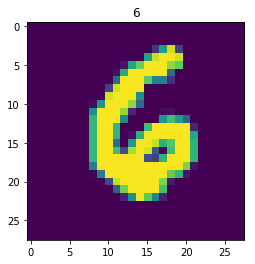

In [23]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()